**Titanic_data.csv** ~>https://www.kaggle.com/c/titanic

O data_set é a respeito da tragédia que aconteceu em 15 de abril de 1912, durante uma viagem inaugural.
O Titanic afundou após colidir com um iceberg, matando 1502 de 2224 passageiros e tripulantes,o data_set consiste de 891 amostras.
    
**-----------------PARAMETROS----------------------------------**

**Passengerid:** parametros de indexação de cada passageiro.

**Surived:** indica se o tripulante sobreviveu, 1=sim 0=não.

**Name:** nome do tripulante.

**Sex:** genero do passageiro.

**Age:** idade do passageiro.

**SibSp:** número de irmãos / cônjuges a bordo do titanic.

**Parch:** número de pais / filhos a bordo do titanic. Algumas crianças viajaram apenas com uma babá, portanto parch = 0 para elas.

**ticket:** ticket do tripulante.

**Fare:** tarifa dos passageiros.

**Cabin:** cabine onde o passageiro esta alocado.

**Embarked:** porto de desembarque do passageiro.



# Conclusões e informações visuais

Tirando conclusões com base nas informações!.

**P1:** Quais são as caracteristicas dos passageiros sobrevivente? tem haver com a classe socioeconomica?

**P2:** Qual a idade média e sua proporção de crianças e adolescentes que viajaram com babá ou irmãos ?

**P3:** O maior fluxo de passageiros da 1° classe se obtem apartir de qual porto de desembarque? E da 3° classe?


# Importando dados Titanic
**importação dos modulos a serem usado e do arquivo_data.csv**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

df_t = pd.read_csv("titanic_data.csv")


## Exploração dos dados
**visualização dos dados para analisar valores a serem tranformados e reparados do data_set**

In [2]:
df_t.head()
df_t.describe()
df_t.shape
df_t.info()
df_t.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Configuração para Limpeza dos dados

In [3]:
def clean_data(column_remove,column_fill): # Criação da função para limpeza do dataframe
    global df_t # coloca o nomo do dataframe no espaço global
    new_columns = [df.lower() for df in df_t.columns] # cria uma lista e com as colunas convertida para minusculas
    df_t.columns = new_columns # Salva a coluna do dataframe
    df_t = df_t.drop(f"{column_remove}",axis=1) # Remove a coluna do dataframe
    df_age_mean = df_t[f'{column_fill}'].mean() # Calcula a média da coluna
    df_t[f'{column_fill}'] = df_t[f'{column_fill}'].fillna(round(df_age_mean)) # Preenche valores "NaN" da coluna do dataframe com a média 
    df_t = df_t.dropna() # Descarta linhas com valores "NaN"
    df_t[f'{column_fill}'] = df_t[f'{column_fill}'].astype(int) # Converte o tipo da coluna do dataframe
    return df_t.info() # retorna as informações do dataframe

clean_data("cabin","age") # chamando a função com argumentos para a limpeza dos dados

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
passengerid    889 non-null int64
survived       889 non-null int64
pclass         889 non-null int64
name           889 non-null object
sex            889 non-null object
age            889 non-null int32
sibsp          889 non-null int64
parch          889 non-null int64
ticket         889 non-null object
fare           889 non-null float64
embarked       889 non-null object
dtypes: float64(1), int32(1), int64(5), object(4)
memory usage: 79.9+ KB


In [4]:
def create_column(column_base): # criação da função para criar colunas do dataframe
    global df_t # coloca o nomo do dataframe no espaço global
    dfa = df_t.query(f'{column_base} > 18').copy() # Cria uma copia do dataframe
    dfk = df_t.query(f'{column_base} < 12').copy() # Cria uma copia do dataframe 
    dft = df_t.query(f'{column_base} >= 12 and {column_base} <= 18').copy() # Cria uma copia do dataframe
    dfa.loc[:,'aclass'] = np.repeat('adult',dfa.shape[0]) # Cria uma coluna "aclass" com amostras repetidas de "adult"
    dfk.loc[:,'aclass'] = np.repeat('kid',dfk.shape[0]) # Cria uma coluna "aclass" com amostras repetidas de "adult"
    dft.loc[:,'aclass'] = np.repeat('teen',dft.shape[0]) # Cria uma coluna "aclass" com amostras repetidas de "adult"
    dfs = dfk.append(dft) # junta 2 copias do dataframe e armazena em um objeto
    df_t = dfs.append(dfa) # Junta 2 copias do dataframe e armazena em um objeto
    return df_t.info() # retorna as informações do dataframe

create_column('age')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 7 to 890
Data columns (total 12 columns):
passengerid    889 non-null int64
survived       889 non-null int64
pclass         889 non-null int64
name           889 non-null object
sex            889 non-null object
age            889 non-null int32
sibsp          889 non-null int64
parch          889 non-null int64
ticket         889 non-null object
fare           889 non-null float64
embarked       889 non-null object
aclass         889 non-null object
dtypes: float64(1), int32(1), int64(5), object(5)
memory usage: 86.8+ KB


# Configuração para plotagem de graficos

In [85]:
def search_data(what):# Criação de uma função para filtrar dados de acodo com a  condição
    global df_t # coloca o nomo do dataframe no espaço global
    return df_t.query(f'{what}') # Retorna um dataframe filtrado

survive = search_data('survived == 1') # Armazena no objeto survive o dataframe filtrado
dead = search_data('survived == 0') # Armazena no objeto dead o dataframe filtrado
print(f'Survived: {survive["survived"].sum()}\nNo survived: {dead["survived"].count()}')

def plotti(pit = df_t,kind='hist',column_list=[],x= False,legend=False,ylabel = 'put_ylabel',title='put_title',column_pie="pclass",xlabel='put_xlabel',lab = ['1','2','3']): # Criação da função de plotar graficos
    global df_t# coloca o nomo do dataframe no espaço global
    
    if x == 'mean':
        plt.ylabel(f'{ylabel}');# plota o label do eixo y
        return pit.groupby(column_list[:1]).mean()[column_list[-1]].plot(kind=f'{kind}',title = f'{title}'); # plota um grafico
    
    elif x == 'count': # condição para usar uma função de contagem
        plt.ylabel(f'{ylabel}');# plota o label do eixo y
        return pit.groupby(column_list[:1]).count()[column_list[-1]].plot(kind=f'{kind}',title = f'{title}'); # plota um grafico
    
    elif x == 'sum':# condição para usar uma função de soma
        plt.ylabel(f'{ylabel}');# plota o label do eixo y
        return pit.groupby(column_list[:1]).sum()[column_list[-1]].plot(kind=f'{kind}',title = f'{title}');# plota um grafico
    
    elif x == 'pie':# condição para usar uma função
        return pit[f'{column_pie}'].value_counts(normalize='True').plot(kind='pie',autopct='%1.1f%%',labels = lab,title=f'{title}');#plotagem do grafico tipo pizza
    


Survived: 340
No survived: 549


# Conclusões e informações visuais

**P1:** Quais são as caracteristicas dos passageiros sobrevivente?

sex
female    231
male      109
Name: pclass, dtype: int64

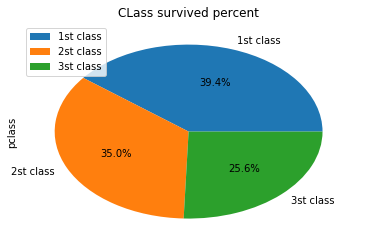

In [63]:
#plotti(pit=survive,kind='bar',column_list=['pclass','aclass'],x='count',ylabel='N° Passageiros',title='Passageiros X Classeconomica')
plotti(x='pie',pit=survive,column_pie='pclass',lab=['1st class','2st class','3st class'],title='CLass survived percent')
plt.legend(loc='upper left')
survive.groupby(['sex']).count()['pclass']#FIltragem de classes economica pela faixa etaria, separados pelo genero.


In [57]:
survive.groupby(['aclass']).count()['sex']# separa grupo da classe faixa etaria contando por genero dos passageiros

aclass
adult    270
kid       39
teen      31
Name: sex, dtype: int64

In [136]:
round(survive.groupby(['sex']).mean()['age'])# arredonda o valor da média de idade por generos

sex
female    29.0
male      28.0
Name: age, dtype: float64

R1: Passageiros de classes altas e médias do genero feminino com idade média de 29 anos.


====================================================================================================

**P2:** Qual a idade média e sua proporção de crianças e adolescentes que viajaram com babá ou irmãos ?

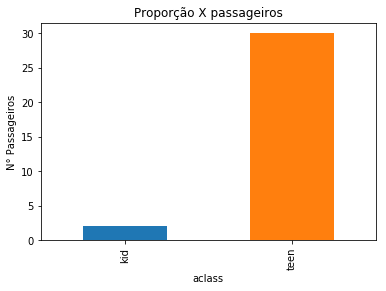

In [98]:
prop_passenger = search_data('parch == 0 and age < 18')# filtrar passageiros de idade baixa sem a presença dos pais
plotti(pit=prop_passenger,kind='bar',column_list =['aclass','age'],x='count',title='Proporção X passageiros',ylabel='N° Passageiros')

In [107]:
round(prop_passenger.groupby(['aclass']).mean()['age'])# criar um grupo com a média de idades por proporção de faixa etaria baixa

aclass
kid      8.0
teen    16.0
Name: age, dtype: float64

R2: Passageiros de faixa etaria baixa e média que viajaram sem os pais totalizam 32 com idade média de 8 para crianças e 16 para adolescentes.

=====================================================================================================================

**P3:** O maior fluxo de passageiros da 1° classe se obtem apartir de qual porto de desembarque? E da 3° classe?

Text(0,0.5,'N° Passageiros')

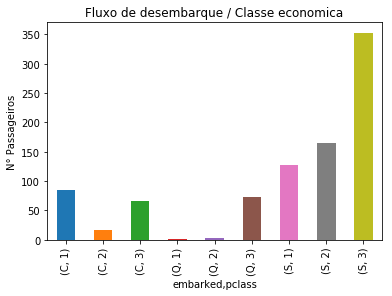

In [135]:
# criar um grupo com o porto de desembarque e a classe economica para serem contados por id(unidade) de passageiros.
df_t.groupby(['embarked','pclass']).count()['passengerid'].plot(kind='bar',title='Fluxo de desembarque / Classe economica')
plt.ylabel('N° Passageiros')# renomeia o eixo y do grafico

R3: O maior fluxo de passageiros da 1° classe se obtem dos portos de Cherbourg(C) e Southampton(S). O maior fluxo de passageiros da 3° classe se obtem no porto de Southampton(S).
    

================================================================================================================

**P4:** Quais são os fatores que muitos passageiros perdessem a vida?

Text(0,0.5,'N° de passageiros')

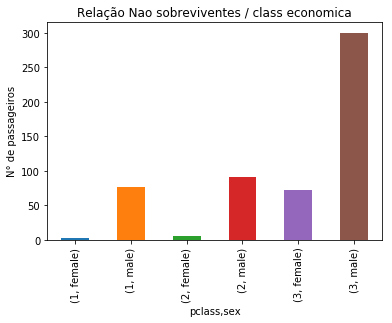

In [145]:
dead.groupby(['pclass','sex']).count()['aclass'].plot(kind='bar',title='Relação Nao sobreviventes / class economica');
plt.ylabel('N° de passageiros')

In [149]:
dead.groupby(['pclass','sex']).count()['aclass']

pclass  sex   
1       female      3
        male       77
2       female      6
        male       91
3       female     72
        male      300
Name: aclass, dtype: int64

R4: O fator que fez muito diferença na hora da escolhe de passageiros que irão para os botes salva-vidas é o genero do passageiro e sua classe economica, fez com que muitos perdessem as vidas.

# Conclusão do conjunto de dados Titanic

Com base no conjuntos de dados obtido, foram feitas muitas alterações para que houvesse uma boa visualização sem comprometer os dados, se obteve um questionamento a respeito dos dados para criar perguntas com base nas caracteristicas dos passageiros, foi feito uma analise para explorar os dados, modificar, limpar, tranformar e criar colunas de dados que possam facilitar a visualização.

Após a analise do conjunto de dados, houve muitas limitações, como **Ticket** do passageiro,**Cabine** e **Tarifa**, onde nao possa se obter quaisquer informação util com estes dados, utilizando metodos de exploração para criar categoria com estes dados para se obter uma melhor compreensão do conjunto de dados, nao se obteve nenhum resultado, pois estas limitações nao dizem muito a respeito dos passageiros, comparado com o genero, idade, classe economica, entre outros.
